<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 07

Logistic regression for a binary classification with a regularization

## I. Code

### 1.Training Data

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
data    = np.genfromtxt("data07.txt", delimiter=',')
pointX  = data[:, 0] 
pointY  = data[:, 1] 
label   = data[:, 2]

pointX0 = pointX[label == 0] 
pointY0 = pointY[label == 0]
pointX1 = pointX[label == 1] 
pointY1 = pointY[label == 1]

### 2. Logistic Regression with a high dimensional feature function

In [0]:
import math

# haperparameters 
tht = [[0]*11]*11 # theta for function 
lr = 0.001

def sigmoid(x): #시그모이드 함수
    return 1/(1+math.exp(-x))

def G(x,y): #x,y에 대한 모델 
  g = 0
  for i in range(11):
    for j in range(11):
      g += tht[j][i]*(x**i)*(y**j)
  return g

def calculate_acc(data):#데이터에 대한 정확도 계산
  correct = 0
  for d in data:
    if sigmoid(G(d[0],d[1]))>=1/2:
      if d[2]==1:
        correct +=1
    else:
      if d[2]==0:
        correct +=1
  return correct/len(data)

### 3. Objective Function with a regularization term

In [0]:
lambda1 = 0.001
lambda2 = 0.01
lambda3 = 1

def loss(data, lamb): #세타값에 대한 데이터의 로스
    Z = [( G(d[0], d[1]) ,int(d[2])) for d in data] 
    entropy = sum([-z[1]*math.log(sigmoid(z[0]))-(1-z[1])*math.log(1-sigmoid(z[0])) for z in Z])/len(Z)
    regularization =  lamb * sum([sum(tht[j][i]**2 for j in range(11)) for i in range(11)])/2
    return entropy + regularization

### 4. Gradient Descent

def gradient_descent():
  

In [0]:
def gradient_descent(lamb):
  global tht
  tht_buffer = tht[:] # 변할 값을 저장해서 한 번에 바꾼다. 
  for j in range(11):
    for i in range(11):
      tht_buffer[j][i] = tht[j][i] - lr*(sum([(sigmoid(G(d[0],d[1])) - d[2])*(d[0]**i)*(d[1]**j) for d in data])/len(data) + lamb*tht[j][i])
  tht = tht_buffer[:] # tht 전역 변수에 업데이트된 세타값 저장

### 5. Training

In [0]:
# Initialize
J  = loss(data, lambda1)
J1 = []
J2 = []
J3 = []

ACC1 =[]
ACC2 =[]
ACC3 =[]

# Training function
def training(lamb,loss_list, acc_list, restart=False):
  if restart:
    tht= [[0]*11]*11
    J = loss(data, lamb)
    loss_list = [J]
    acc_list = [J]

    
  while True:
    temp = J
    gradient_descent(lamb)
    acc_list.append(calculate_acc(data))
    # Update and Store Loss
    J = loss(data, lamb)
    loss_list.append(J)
    if abs(J-loss_list[len(loss_list)-2])  < 1e-7: # Convergence
      break

In [0]:
training(lambda1, J1, ACC1, restart=True) # Over  - fitting
training(lambda2, J2, ACC2, restart=True) # right - fitting
training(lambda3, J3, ACC3, restart=True) # under - fitting

### 6. Accuracy

Training을 하면서 Accuracy 또한 계산되며, 이는 ACC리스트에 저장된다. 

## II. Results

### 1. The training data
* label 0 = blue
* label 1 = red

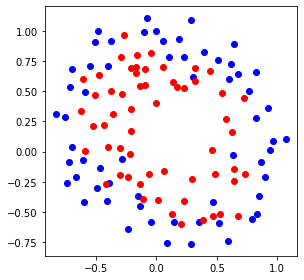

In [74]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b') 
plt.scatter(pointX1, pointY1, c='r') 
plt.tight_layout() 
plt.gca().set_aspect('equal', adjustable='box') 
plt.show()

### 2. training error with varying regularization parameters

* $\lambda_1$ =0.001 :  over-fitting is demonstrated ($J(\theta)$ in red)
* $\lambda_2$ =0.1   :  just-right is demonstrated ($J(\theta)$ in green)
* $\lambda_3$  =1    :  under-fitting is demonstrated ($J(\theta)$ in blue)

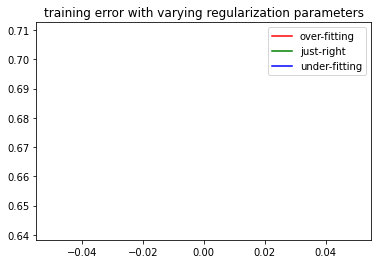

In [86]:
plt.figure()
plt.plot(J1, c='r') 
plt.plot(J2, c='g') 
plt.plot(J3, c='b') 
#plt.tight_layout() 
plt.title('training error with varying regularization parameters')
plt.legend(['over-fitting', 'just-right', 'under-fitting'])
plt.show()

### 3. The values of the chosen regularization parameteres $\lambda$

In [76]:
print("Lambda when over-fitting  : ",lambda1)
print("Lambda when just-right    : ",lambda1)
print("Lambda when under-fitting : ",lambda1)
plt.plot([lambda1, lambda2, lambda3], color=['r','g','b'])

Lambda when over-fitting  :  0.001
Lambda when just-right    :  0.001
Lambda when under-fitting :  0.001


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f45ca544158> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

### 4. The training accuracy with varying regularaization parameters



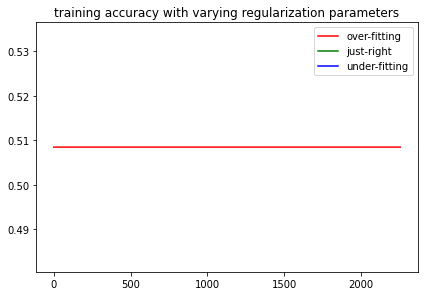

In [77]:
plt.figure()
plt.plot(ACC1, c='r') 
plt.plot(ACC2, c='g') 
plt.plot(ACC3, c='b') 
plt.tight_layout() 
plt.title('training accuracy with varying regularization parameters')
plt.legend(['over-fitting', 'just-right', 'under-fitting'])
plt.show()

### 5.The final training accuracy with varying regularization parameters

In [78]:
print("The training Accuracy when over-fitting  : ",ACC1[-1])
print("The training Accuracy when just-right    : ",ACC2[-1])
print("The training Accuracy when under-fitting : ",ACC3[-1])

plt.plot([ACC1[-1], ACC2[-1], ACC3[-1]], color=['r','g','b'])

The training Accuracy when over-fitting  :  0.5084745762711864


IndexError: ignored

### 6. The optimal classifier with varying regularization parameters superimposed on the training data

